In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import math

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# import plotly.graph_objects as go
# import plotly.express as px

# import tensorflow as tf
# from tensorflow import keras

# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error

# import seaborn as seabornInstance 
# from sklearn.model_selection import train_test_split 
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn import metrics

plt.rcParams.update({'font.size': 16})

In [2]:
pd.set_option("display.precision", 5)
pd.set_option('display.max_rows', 15)

In [3]:
dfMS = pd.read_csv('HIST_PAINEL_COVIDBR_11ago2020(1).csv', low_memory=False)
dfMS['data'] = pd.to_datetime(dfMS['data'], dayfirst=True)

In [4]:
dfMS = dfMS.loc[:,['data','estado','municipio','populacaoTCU2019','casosAcumulado','casosNovos','obitosAcumulado','obitosNovos']]
# dfMS = dfMS.loc[:,['data','estado','municipio','casosNovos','obitosNovos']]
dfMS = dfMS.sort_values(by=['estado','municipio'], ascending=True)
dfMS = dfMS.dropna()
dfMS

,data,estado,municipio,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
12046,2020-03-27,AC,Acrelândia,15256,0,0,0,0
12047,2020-03-28,AC,Acrelândia,15256,0,0,0,0
12048,2020-03-29,AC,Acrelândia,15256,2,2,0,0
12049,2020-03-30,AC,Acrelândia,15256,6,4,0,0
12050,2020-03-31,AC,Acrelândia,15256,7,1,0,0
...,...,...,...,...,...,...,...,...
67241,2020-08-07,TO,Xambioá,11540,580,1,8,0
67242,2020-08-08,TO,Xambioá,11540,583,3,8,0
67243,2020-08-09,TO,Xambioá,11540,597,14,8,0
67244,2020-08-10,TO,Xambioá,11540,597,0,8,0


In [5]:
listCity = dfMS['municipio'].astype(str).unique()
listCity

array(['Acrelândia', 'Assis Brasil', 'Brasiléia', ..., 'Tupiratins',
       'Wanderlândia', 'Xambioá'], dtype=object)

In [6]:
listState = dfMS['estado'].astype(str).unique()
listState

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

In [7]:
dfToday = dfMS[dfMS['data'] == dfMS['data'].max()]
dfToday

,data,estado,municipio,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
12183,2020-08-11,AC,Acrelândia,15256,308,4,7,0
12321,2020-08-11,AC,Assis Brasil,7417,392,6,8,0
12459,2020-08-11,AC,Brasiléia,26278,909,9,12,0
12597,2020-08-11,AC,Bujari,10266,346,4,6,0
12735,2020-08-11,AC,Capixaba,11733,232,0,7,0
...,...,...,...,...,...,...,...,...
66555,2020-08-11,TO,Tocantínia,7545,271,15,4,0
66831,2020-08-11,TO,Tupirama,1891,43,3,1,0
66969,2020-08-11,TO,Tupiratins,2671,6,0,0,0
67107,2020-08-11,TO,Wanderlândia,11683,189,7,5,0


In [8]:
dfMSelect = dfMS.loc[:,['data','estado','municipio','casosNovos','obitosNovos']]
sumCases = dfMSelect.groupby(['estado']).sum()
sumCases.reset_index(level=0, inplace=True)
sumCases.loc[sumCases['casosNovos'] <= 120000, ['estado']] = 'Other_States'

In [9]:
sumCases = sumCases.groupby(['estado']).sum()
sumCases = sumCases.sort_values(by=['casosNovos'], ascending=False)
sumCases.reset_index(level=0, inplace=True)
sumCases

,estado,casosNovos,obitosNovos
0,Other_States,1306705,36523
1,SP,639420,25571
2,BA,195603,4043
3,CE,188720,8011
4,RJ,182563,14212
5,PA,169613,5901
6,MG,156038,3571
7,MA,132060,3204
8,DF,127484,1815


In [10]:
# sumCases.groupby(['estado']).sum().plot(kind='pie', legend=None, subplots=True, startangle=90,
#                                        figsize=(19.20,10.80), autopct='%1.1f%%')

In [11]:
dEstado = {}
for index in range(len(listState)):
    dEstado[index] = dfMS[dfMS['estado'] == listState[index]]
    dEstado[index] = dEstado[index].dropna()
    dEstado[index].reset_index(drop=True, inplace=True)

In [12]:
dEstado[25]

,data,estado,municipio,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
0,2020-03-27,SP,Adamantina,35068,0,0,0,0
1,2020-03-28,SP,Adamantina,35068,0,0,0,0
2,2020-03-29,SP,Adamantina,35068,0,0,0,0
3,2020-03-30,SP,Adamantina,35068,0,0,0,0
4,2020-03-31,SP,Adamantina,35068,0,0,0,0
...,...,...,...,...,...,...,...,...
88729,2020-08-07,SP,Óleo,2496,2,0,0,0
88730,2020-08-08,SP,Óleo,2496,2,0,0,0
88731,2020-08-09,SP,Óleo,2496,2,0,0,0
88732,2020-08-10,SP,Óleo,2496,2,0,0,0


In [13]:
testMun = []
dMunicipio = []
for index in range(len(listState)):
    testMun = dEstado[index]['municipio'].astype(str).unique()
    dMunicipio.append(testMun)

In [14]:
testMun[0]

'Abreulândia'

In [15]:
len(dMunicipio[1])

102

In [16]:
totalCases_list=[]

for index in range(len(listState)):
    testMun = dEstado[index]['municipio'].astype(str).unique()
    dMunicipio.append(testMun)
    for jindex in range(len(dMunicipio[index])):
        print(index,jindex)
#         totalCases = [dEstado[index]['casosNovos']]
# #         header = [dMunicipio[jindex]]
#         totalCases = pd.concat(totalCases, axis=1)
#         totalCases_list.append(totalCases)
#         print(totalCases)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
1 79
1 80
1 81
1 82
1 83
1 84
1 85
1 86
1 87
1 88
1 89
1 90
1 91
1 92
1 93
1 94
1 95
1 96
1 97
1 98
1 99
1 100
1 101
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43
2 44
2 45
2 46
2 47
2 48
2 49
2 50
2 51
2 52
2 53
2 54
2 55
2 56
2 57
2 58
2 59
2 60
2 61
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
4 0
4 1
4 2
4 3
4 4
4 5
4 6


10 263
10 264
10 265
10 266
10 267
10 268
10 269
10 270
10 271
10 272
10 273
10 274
10 275
10 276
10 277
10 278
10 279
10 280
10 281
10 282
10 283
10 284
10 285
10 286
10 287
10 288
10 289
10 290
10 291
10 292
10 293
10 294
10 295
10 296
10 297
10 298
10 299
10 300
10 301
10 302
10 303
10 304
10 305
10 306
10 307
10 308
10 309
10 310
10 311
10 312
10 313
10 314
10 315
10 316
10 317
10 318
10 319
10 320
10 321
10 322
10 323
10 324
10 325
10 326
10 327
10 328
10 329
10 330
10 331
10 332
10 333
10 334
10 335
10 336
10 337
10 338
10 339
10 340
10 341
10 342
10 343
10 344
10 345
10 346
10 347
10 348
10 349
10 350
10 351
10 352
10 353
10 354
10 355
10 356
10 357
10 358
10 359
10 360
10 361
10 362
10 363
10 364
10 365
10 366
10 367
10 368
10 369
10 370
10 371
10 372
10 373
10 374
10 375
10 376
10 377
10 378
10 379
10 380
10 381
10 382
10 383
10 384
10 385
10 386
10 387
10 388
10 389
10 390
10 391
10 392
10 393
10 394
10 395
10 396
10 397
10 398
10 399
10 400
10 401
10 402
10 403
10 404
10 405

17 3
17 4
17 5
17 6
17 7
17 8
17 9
17 10
17 11
17 12
17 13
17 14
17 15
17 16
17 17
17 18
17 19
17 20
17 21
17 22
17 23
17 24
17 25
17 26
17 27
17 28
17 29
17 30
17 31
17 32
17 33
17 34
17 35
17 36
17 37
17 38
17 39
17 40
17 41
17 42
17 43
17 44
17 45
17 46
17 47
17 48
17 49
17 50
17 51
17 52
17 53
17 54
17 55
17 56
17 57
17 58
17 59
17 60
17 61
17 62
17 63
17 64
17 65
17 66
17 67
17 68
17 69
17 70
17 71
17 72
17 73
17 74
17 75
17 76
17 77
17 78
17 79
17 80
17 81
17 82
17 83
17 84
17 85
17 86
17 87
17 88
17 89
17 90
17 91
17 92
17 93
17 94
17 95
17 96
17 97
17 98
17 99
17 100
17 101
17 102
17 103
17 104
17 105
17 106
17 107
17 108
17 109
17 110
17 111
17 112
17 113
17 114
17 115
17 116
17 117
17 118
17 119
17 120
17 121
17 122
17 123
17 124
17 125
17 126
17 127
17 128
17 129
17 130
17 131
17 132
17 133
17 134
17 135
17 136
17 137
17 138
17 139
17 140
17 141
17 142
17 143
17 144
17 145
17 146
17 147
17 148
17 149
17 150
17 151
17 152
17 153
17 154
17 155
17 156
17 157
17 158
17 159
17 16

25 168
25 169
25 170
25 171
25 172
25 173
25 174
25 175
25 176
25 177
25 178
25 179
25 180
25 181
25 182
25 183
25 184
25 185
25 186
25 187
25 188
25 189
25 190
25 191
25 192
25 193
25 194
25 195
25 196
25 197
25 198
25 199
25 200
25 201
25 202
25 203
25 204
25 205
25 206
25 207
25 208
25 209
25 210
25 211
25 212
25 213
25 214
25 215
25 216
25 217
25 218
25 219
25 220
25 221
25 222
25 223
25 224
25 225
25 226
25 227
25 228
25 229
25 230
25 231
25 232
25 233
25 234
25 235
25 236
25 237
25 238
25 239
25 240
25 241
25 242
25 243
25 244
25 245
25 246
25 247
25 248
25 249
25 250
25 251
25 252
25 253
25 254
25 255
25 256
25 257
25 258
25 259
25 260
25 261
25 262
25 263
25 264
25 265
25 266
25 267
25 268
25 269
25 270
25 271
25 272
25 273
25 274
25 275
25 276
25 277
25 278
25 279
25 280
25 281
25 282
25 283
25 284
25 285
25 286
25 287
25 288
25 289
25 290
25 291
25 292
25 293
25 294
25 295
25 296
25 297
25 298
25 299
25 300
25 301
25 302
25 303
25 304
25 305
25 306
25 307
25 308
25 309
25 310

In [17]:
dfSP = dfToday[(dfToday['estado'] == 'MG') & (dfToday['casosAcumulado'] > 1000)]
dfSP = dfSP.sort_values(by=['casosAcumulado'], ascending=False)
dfSP

,data,estado,municipio,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
324891,2020-08-11,MG,Belo Horizonte,2512070,25096,0,670,0
429495,2020-08-11,MG,Uberlândia,691305,14821,182,272,5
365049,2020-08-11,MG,Ipatinga,263410,6282,56,106,0
359253,2020-08-11,MG,Governador Valadares,279885,4949,42,164,0
344073,2020-08-11,MG,Contagem,663855,4311,25,203,0
...,...,...,...,...,...,...,...,...
427011,2020-08-11,MG,Timóteo,89842,1168,0,44,0
424803,2020-08-11,MG,Sete Lagoas,239639,1133,30,15,0
354423,2020-08-11,MG,Extrema,36225,1116,24,9,0
379401,2020-08-11,MG,Mariana,60724,1090,0,14,1


In [18]:
today = pd.to_datetime("today").date()
today

datetime.date(2020, 8, 17)

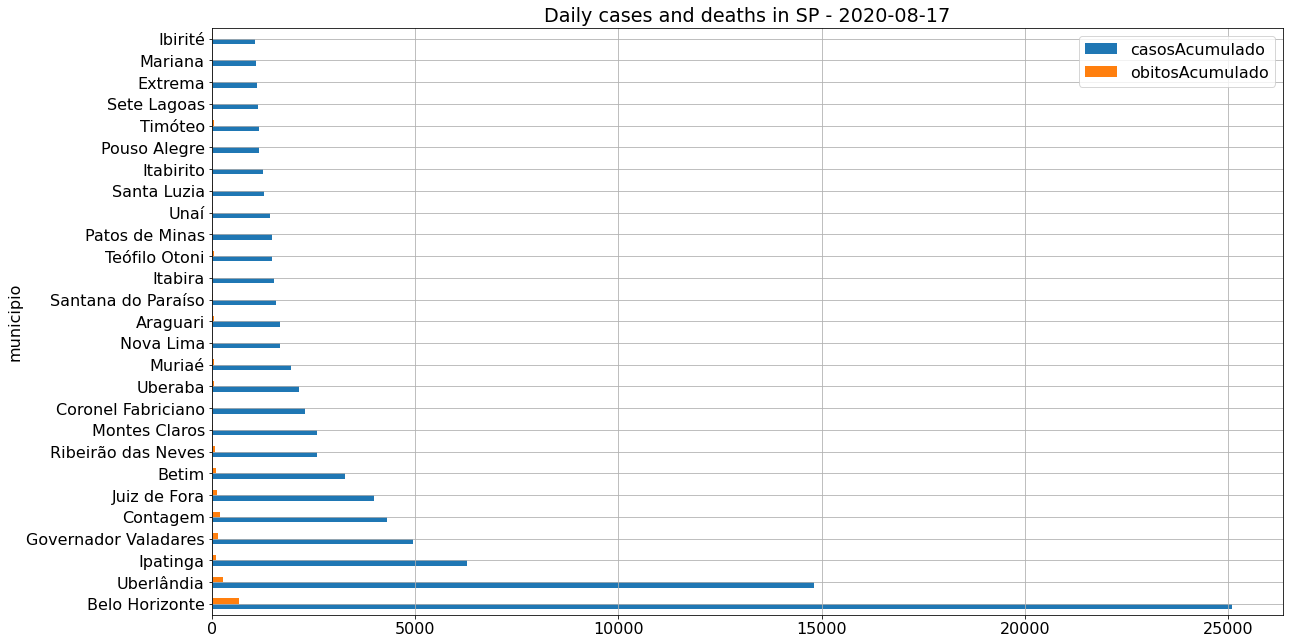

In [19]:
dfSP.plot.barh(x='municipio', y=['casosAcumulado','obitosAcumulado'], figsize=(19.20,10.80))
plt.title('Daily cases and deaths in SP - '+str(today))
plt.grid()

In [20]:
dfSP = dfSP.loc[:,['municipio','casosAcumulado','obitosAcumulado']]
dfSP = dfSP.set_index('municipio')
dfSP

,casosAcumulado,obitosAcumulado
municipio,,
Belo Horizonte,25096,670
Uberlândia,14821,272
Ipatinga,6282,106
Governador Valadares,4949,164
Contagem,4311,203
...,...,...
Timóteo,1168,44
Sete Lagoas,1133,15
Extrema,1116,9


In [21]:
dfSP

,casosAcumulado,obitosAcumulado
municipio,,
Belo Horizonte,25096,670
Uberlândia,14821,272
Ipatinga,6282,106
Governador Valadares,4949,164
Contagem,4311,203
...,...,...
Timóteo,1168,44
Sete Lagoas,1133,15
Extrema,1116,9


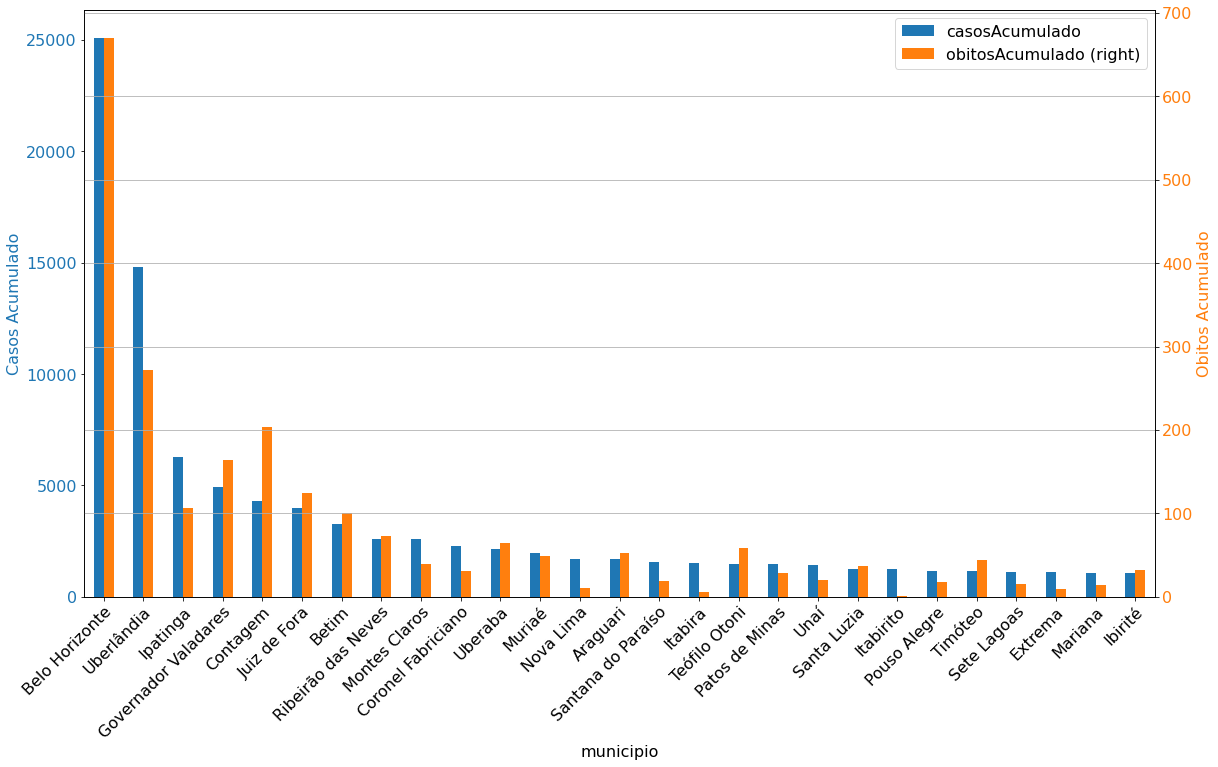

In [22]:
dfSP.plot.bar(figsize=(19.20,10.80), secondary_y= 'obitosAcumulado')

ax1, ax2 = plt.gcf().get_axes()
# ax1.tick_params(axis='x', labelrotation=55, ha='right')
# plt.xticks(rotation=15,ha='right')
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

color = 'tab:blue'
ax1.set_ylabel('Casos Acumulado', color=color)
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:orange'
ax2.set_ylabel('Obitos Acumulado', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# plt.title('Casos e obitos acumulados nos municipios de '+str(dfEstado[10]+' em '+str(today)))

plt.grid()
plt.show()

In [23]:
# fig = plt.figure(figsize=(19.20,10.80)) # Create matplotlib figure
# ax = fig.add_subplot(111) # Create matplotlib axes



# width = 0.4
# dfSP.casosAcumulado.plot(kind='bar',color='red', ax=ax, width=width, position=1)
# ax.set_ylabel('Casos Acumulados')
# ax.set_xlabel('municipio')

# ax2 = ax.twinx() 


# dfSP.obitosAcumulado.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)
# ax.set_ylabel('Obtidos Acumulados')

# ax2.set_ylabel('Price')

# plt.grid()
# plt.show()

In [24]:
# fig, ax1 = plt.subplots(figsize=(19.20,10.80))

# color = 'tab:blue'
# ax1.bar(dfSP.index, dfSP.casosAcumulado, color=color, label='Total Cases')
# ax1.set_xlabel('Date')
# ax1.set_ylabel('Total Cases', color=color)
# ax1.tick_params(axis='y', labelcolor=color)
# #plt.ticklabel_format(style='plain', axis='y')
# plt.grid()

# ax2 = ax1.twinx()

# color = 'tab:red'
# ax2.bar(dfSP.index, dfSP.obitosAcumulado, color=color, label = 'Total Deaths')
# ax2.set_xlabel('Date')
# ax2.set_ylabel('Total Deaths', color=color)
# ax2.tick_params(axis='y', labelcolor=color)
# #plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))

# ax = plt.gca()
# # ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
# # ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# # ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
# # ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
# plt.gcf().autofmt_xdate()

# fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)

# plt.show()

In [25]:
# fig, ax1 = plt.subplots(figsize=(19.20,10.80))

# color = 'tab:blue'
# ax1.bar(dfSP.index, dfSP.casosAcumulado, color=color, label='Total Cases')
# ax1.set_xlabel('Date')
# ax1.set_ylabel('Total Cases', color=color)
# ax1.tick_params(axis='y', labelcolor=color)
# #plt.ticklabel_format(style='plain', axis='y')
# plt.grid()

# ax2 = ax1.twinx()

# color = 'tab:red'
# ax2.bar(dfSP.index, dfSP.obitosAcumulado, color=color, label = 'Total Deaths')
# ax2.set_xlabel('Date')
# ax2.set_ylabel('Total Deaths', color=color)
# ax2.tick_params(axis='y', labelcolor=color)
# #plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))

# ax = plt.gca()
# # ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
# # ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# # ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
# # ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
# plt.gcf().autofmt_xdate()

# fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)

# plt.show()